In [1]:
import torch
print(torch.__version__)

1.4.0


In [2]:
x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

In [3]:
print(x.shape)
# torch.Size([1,2]) # one entity of two items
print(y.shape)
# torch.Size([2,1]) # two entities of one item each
print(x.dtype)
# torch.int64

torch.Size([1, 2])
torch.Size([2, 1])
torch.int64


In [4]:
x = torch.tensor([False, 1, 2.0])
print(x)
# tensor([0., 1., 2.])

tensor([0., 1., 2.])


In [5]:
torch.zeros((3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [6]:
torch.ones((3, 4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [7]:
torch.randint(low=0, high=10, size=(3,4))

tensor([[7, 1, 4, 4],
        [7, 5, 8, 6],
        [5, 9, 6, 1]])

In [8]:
torch.rand(3, 4)

tensor([[0.6868, 0.1810, 0.1940, 0.0593],
        [0.1796, 0.5583, 0.7235, 0.9979],
        [0.9066, 0.6969, 0.0422, 0.0456]])

In [9]:
torch.randn((3,4))

tensor([[-0.3616,  0.7469,  0.4819,  0.1334],
        [ 0.5393, -1.0745, -0.7683, -1.6548],
        [-0.1704, -0.3742,  0.1750,  1.0313]])

### Operations on Tensors

In [10]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]]) 
print(x * 10)

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])


In [11]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
y = x.add(10)

In [12]:
y = torch.tensor([2, 3, 1, 0]) # y.shape == (4,)
y = y.view(4,1)                # y.shape == (4, 1)

In [13]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
print(torch.matmul(x, y))

tensor([[11],
        [35]])


In [14]:
print(x@y)

tensor([[11],
        [35]])


### Autograd

In [15]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)

In [16]:
out = x.pow(2).sum()

In [17]:
out.backward()

In [18]:
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

In [19]:
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)
x, y = x.cuda(), y.cuda()

In [20]:
%time z=(x@y)

CPU times: user 0 ns, sys: 1 ms, total: 1 ms
Wall time: 616 µs


In [21]:
import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%time z = np.matmul(x,y)

CPU times: user 52.6 ms, sys: 2.42 ms, total: 55 ms
Wall time: 9.76 ms


### Building a Nerual Network using PyTorch

In [22]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [23]:
import torch
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [24]:
import torch.nn as nn

In [25]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [26]:
mynet = MyNeuralNet()

In [27]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.5443,  0.1337],
        [-0.5532, -0.2438],
        [-0.5725,  0.5165],
        [-0.0239, -0.6196],
        [-0.5058, -0.5026],
        [-0.5476,  0.3154],
        [ 0.6217, -0.2044],
        [-0.5342, -0.2857]], requires_grad=True)

In [28]:
print(mynet.parameters())
for par in mynet.parameters():
      print(par)

<generator object Module.parameters at 0x7f8bd3e48150>
Parameter containing:
tensor([[ 0.5443,  0.1337],
        [-0.5532, -0.2438],
        [-0.5725,  0.5165],
        [-0.0239, -0.6196],
        [-0.5058, -0.5026],
        [-0.5476,  0.3154],
        [ 0.6217, -0.2044],
        [-0.5342, -0.2857]], requires_grad=True)
Parameter containing:
tensor([-0.5328, -0.5672,  0.0724,  0.5358,  0.4703, -0.3994, -0.0685,  0.0747],
       requires_grad=True)
Parameter containing:
tensor([[-0.0040,  0.2947,  0.2871, -0.1070,  0.1256, -0.1273,  0.3510, -0.2132]],
       requires_grad=True)
Parameter containing:
tensor([0.1098], requires_grad=True)


In [29]:
loss_func = nn.MSELoss()

In [30]:
loss_value = loss_func(mynet(X),Y)
print(loss_value)
# tensor(91.5550, grad_fn=<MseLossBackward>)

tensor(86.4930, grad_fn=<MseLossBackward>)


In [31]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [32]:
opt.zero_grad()
loss_value = loss_func(mynet(X),Y)
loss_value.backward()
opt.step()

In [33]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)

Text(0, 0.5, 'loss value')

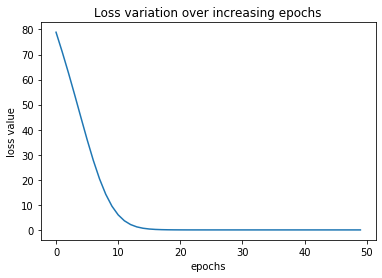

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [35]:
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
    
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

/home/yyr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/home/yyr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [36]:
for a,b in dl:
    print(a, b)

tensor([[5., 6.],
        [1., 2.]]) tensor([[11.],
        [ 3.]])
tensor([[7., 8.],
        [3., 4.]]) tensor([[15.],
        [ 7.]])


In [37]:
for _ in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(mynet(ix),iy)
        loss_value.backward()
        opt.step()

### Predict on new data

In [38]:
val_x = [[10,11]]
val_x = torch.tensor(val_x).float()
mynet(val_x)

tensor([[21.0415]], grad_fn=<AddmmBackward>)

### Custom Loss

In [39]:
def my_mean_squared_error(x, y):
    loss = (x-y)**2
    loss = loss.mean()
    return loss

In [40]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(X),Y)
print(loss_value)
print(my_mean_squared_error(mynet(X),Y))


tensor(0.0005, grad_fn=<MseLossBackward>)
tensor(0.0005, grad_fn=<MeanBackward0>)


### Inspect Hidden Layers

In [41]:
input_to_hidden = mynet.input_to_hidden_layer(X)
hidden_activation = mynet.hidden_layer_activation(input_to_hidden)
print(hidden_activation)

tensor([[0.8565, 0.0000, 1.4982, 0.0000, 0.0000, 0.0000, 1.6113, 0.0000],
        [2.9167, 0.0000, 2.5650, 0.0000, 0.0000, 0.0000, 4.2366, 0.0000],
        [4.9769, 0.0000, 3.6317, 0.0000, 0.0000, 0.0000, 6.8619, 0.0000],
        [7.0371, 0.0000, 4.6985, 0.0000, 0.0000, 0.0000, 9.4872, 0.0000]],
       grad_fn=<ReluBackward0>)


In [42]:
class neuralnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        hidden1 = self.input_to_hidden_layer(x)
        hidden2 = self.hidden_layer_activation(hidden1)
        output = self.hidden_to_output_layer(hidden2)
        return output, hidden2
mynet = neuralnet()
mynet(X)[1]

tensor([[0.2676, 0.0000, 1.2970, 0.2303, 0.0000, 0.0000, 0.0000, 0.6691],
        [0.7231, 0.0000, 2.5974, 0.6683, 0.0000, 0.0000, 0.0000, 0.7314],
        [1.1786, 0.1709, 3.8977, 1.1063, 0.0000, 0.0000, 0.0000, 0.7937],
        [1.6340, 0.6053, 5.1981, 1.5443, 0.0000, 0.0000, 0.0000, 0.8559]],
       grad_fn=<ReluBackward0>)